In [ ]:
import io
import cv2
import numpy as np
import time
from google.colab.patches import cv2_imshow
from skimage import measure
from more_itertools import run_length

In [ ]:
def short_names(name):
  name = name.lower()
  if name == 'empty':
    return 'em'
  else:
    new_name = ''
    c, n = name.split(' ')
    if c == 'white':
      new_name += 'w'
    elif c == 'black':
      new_name += 'b'
    if n == 'rook':
      new_name += 'r'
    if n == 'bishop':
      new_name += 'b'
    if n == 'queen':
      new_name += 'q'
    if n == 'king':
      new_name += 'k'
    if n == 'horse':
      new_name += 'h'
    if n == 'pawn':
      new_name += 'p'
  return new_name


def convert_cell(value):
    if value == 'em':
        return None
    else:
        color, piece = value[0], value[1]
        return piece.upper() if color == 'w' else piece.lower()


def convert_rank(rank):
    return ''.join(
        value * count if value else str(count)
        for value, count in run_length.encode(map(convert_cell, rank))
    )


def board_to_fen(board):
    return '/'.join(map(convert_rank, board)) + ' w KQkq - 0 1'

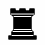

Please input the name of this piece: 
black rook
black rook (0, 0)
black rook (0, 5)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning:

DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.



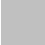

Please input the name of this piece: 
empty
empty (0, 1)
empty (0, 2)
empty (0, 4)
empty (0, 7)
empty (1, 2)
empty (1, 3)
empty (2, 0)
empty (2, 3)
empty (2, 4)
empty (2, 7)
empty (3, 0)
empty (3, 1)
empty (3, 3)
empty (3, 4)
empty (3, 5)
empty (3, 7)
empty (4, 0)
empty (4, 1)
empty (4, 2)
empty (4, 5)
empty (4, 7)
empty (5, 0)
empty (5, 1)
empty (5, 3)
empty (5, 4)
empty (5, 6)
empty (5, 7)
empty (6, 2)
empty (6, 3)
empty (6, 4)
empty (7, 0)
empty (7, 1)
empty (7, 2)
empty (7, 6)


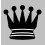

Please input the name of this piece: 
black queen
black queen (0, 3)


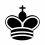

Please input the name of this piece: 
black king
black king (0, 6)


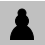

Please input the name of this piece: 
black pawn
black pawn (1, 0)
black pawn (1, 1)
black pawn (1, 4)
black pawn (1, 5)
black pawn (1, 7)
black pawn (2, 2)
black pawn (2, 6)


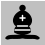

Please input the name of this piece: 
black bishop
black bishop (1, 6)
black bishop (4, 6)


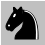

Please input the name of this piece: 
black horse
black horse (2, 1)
black horse (2, 5)


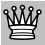

Please input the name of this piece: 
white queen
white queen (3, 2)


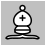

Please input the name of this piece: 
white bishop
white bishop (3, 6)
white bishop (7, 5)


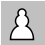

Please input the name of this piece: 
white pawn
white pawn (4, 3)
white pawn (4, 4)
white pawn (6, 0)
white pawn (6, 1)
white pawn (6, 5)
white pawn (6, 6)
white pawn (6, 7)


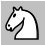

Please input the name of this piece: 
white horse
white horse (5, 2)
white horse (5, 5)


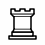

Please input the name of this piece: 
white rook
white rook (7, 3)
white rook (7, 7)


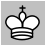

Please input the name of this piece: 
white king
white king (7, 4)


In [ ]:
img = cv2.imread("chess.png")
threshold = 0.9
offset = 45
cb = [[None for _ in range(8)] for _ in range(8)]
new = [['em' for _ in range(8)] for _ in range(8)]
pos_strings, visited = [], []

for i in range(8):
  for j in range(8):
    cb[i][j] = img[offset * i: offset * (i+1), offset * j: offset * (j+1)]

for i in range(8):
  for j in range(8):
    if (i,j) in visited:
      continue
    to_find = cb[i][j]
    cv2_imshow(to_find)
    time.sleep(0.2)
    print('Please input the name of this piece: ')
    name = input()

    for r in range(8):
      for c in range(8):
        comp = cb[r][c]
        res = measure.compare_ssim(to_find, comp, multichannel=True)
        if res >= threshold:
          new[r][c] = short_names(name)
          pos_strings.append(name + ' (' + str(r) + ', ' + str(c) + ')')
          visited.append((r, c))
          print(name + ' (' + str(r) + ', ' + str(c) + ')')

In [ ]:
print('Positions of pieces:\n')
for p in pos_strings:
  if 'empty' in p:
    continue
  print('- ' + p)

Positions of pieces:

- black rook (0, 0)
- black rook (0, 5)
- black queen (0, 3)
- black king (0, 6)
- black pawn (1, 0)
- black pawn (1, 1)
- black pawn (1, 4)
- black pawn (1, 5)
- black pawn (1, 7)
- black pawn (2, 2)
- black pawn (2, 6)
- black bishop (1, 6)
- black bishop (4, 6)
- black horse (2, 1)
- black horse (2, 5)
- white queen (3, 2)
- white bishop (3, 6)
- white bishop (7, 5)
- white pawn (4, 3)
- white pawn (4, 4)
- white pawn (6, 0)
- white pawn (6, 1)
- white pawn (6, 5)
- white pawn (6, 6)
- white pawn (6, 7)
- white horse (5, 2)
- white horse (5, 5)
- white rook (7, 3)
- white rook (7, 7)
- white king (7, 4)


In [ ]:
print(new)

[['br', 'em', 'em', 'bq', 'em', 'br', 'bk', 'em'], ['bp', 'bp', 'em', 'em', 'bp', 'bp', 'bb', 'bp'], ['em', 'bh', 'bp', 'em', 'em', 'bh', 'bp', 'em'], ['em', 'em', 'wq', 'em', 'em', 'em', 'wb', 'em'], ['em', 'em', 'em', 'wp', 'wp', 'em', 'bb', 'em'], ['em', 'em', 'wh', 'em', 'em', 'wh', 'em', 'em'], ['wp', 'wp', 'em', 'em', 'em', 'wp', 'wp', 'wp'], ['em', 'em', 'em', 'wr', 'wk', 'wb', 'em', 'wr']]


In [ ]:
board_to_fen(new)

'r2q1rk1/pp2ppbp/1hp2hp1/2Q3B1/3PP1b1/2H2H2/PP3PPP/3RKB1R w KQkq - 0 1'